In [1]:
%pylab inline
import time
import numpy as np
import matplotlib.pyplot as plt
from utils import img_utils
import seaborn as sns
import utils.math_utils as mu
import nibabel as nib

from dipy.core.gradients import gradient_table
reload(img_utils)

Populating the interactive namespace from numpy and matplotlib


<module 'utils.img_utils' from 'utils/img_utils.pyc'>

In [8]:
bvals = np.loadtxt('./HCP/100408/'+ 'bvals_100408')
#bvals.shape, set(bvals), len(set(bvals))
res = {}
for b in bvals:
    if b not in res :
        res[b] = 0
    res[b] += 1

res
    




{5.0: 18,
 990.0: 10,
 995.0: 33,
 1000.0: 28,
 1005.0: 19,
 1985.0: 3,
 1990.0: 23,
 1995.0: 14,
 2000.0: 18,
 2005.0: 27,
 2010.0: 5,
 2980.0: 1,
 2985.0: 11,
 2990.0: 21,
 2995.0: 20,
 3000.0: 15,
 3005.0: 13,
 3010.0: 9}

In [98]:
def plot_iterations(ys,subjects,legend,title="",base_folder=None, nombre=None):

    dominio = arange(len(subjects))

    lala = plt.plot(dominio, ys, color="y")

    plt.xticks(dominio,('S1','S2','S3','S4','S5','S6'))
    #plt.legend(lala,('G'+str(i+1) +":"+str(gdirections[i]) for i in range(0,6)) , loc=2, bbox_to_anchor=(1, 0.5))
    plt.legend(lala,('S'+str(i+1) +":"+str(subjects[i]) for i in range(0,6)) , loc=2, bbox_to_anchor=(1, 0.5))

    plt.title(title)


    plt.legend([legend ], loc='upper right')

    plt.ylabel(legend)
    plt.xlabel('iteracion')

    if base_folder :
        plt.savefig(base_folder +nombre + '.pdf')

    plt.show()    
    return plt
        

def plot_iterations_many(yss,subjects,legends,ylabel="", title="",base_folder=None, nombre=None):

    dominio = arange(len(subjects))

    for ys in yss:
        lala = plt.plot(dominio, ys)

    plt.xticks(dominio,('S1','S2','S3','S4','S5','S6'))
    #plt.legend(lala,('G'+str(i+1) +":"+str(gdirections[i]) for i in range(0,6)) , loc=2, bbox_to_anchor=(1, 0.5))
    plt.legend(lala,('S'+str(i+1) +":"+str(subjects[i]) for i in range(0,6)) , loc=2, bbox_to_anchor=(1, 0.5))

    plt.title(title)


    plt.legend(legends, loc='upper right')

    plt.ylabel(ylabel)
    plt.xlabel('iteracion')

    if base_folder :
        plt.savefig(base_folder + nombre +'.pdf')
        
    plt.show()

In [20]:
def load_subject(index, numbers, bval=None, bvalpos=None ):
    subject = str(numbers[index])
    folder = './HCP/'+subject+'/'
    bvals = np.loadtxt(folder+ 'bvals_'+subject)
    bvecs = np.loadtxt(folder+'bvecs_'+subject)
    
    if bvalpos is not None:
        img = nib.load(folder+ 'data_small_12x12x12x6_'+subject+'_b'+str(bval)+'.nii.gz')
        gtab = gradient_table(bvals=bvals[bvalpos], bvecs=bvecs[:,bvalpos])
    else:
        img = nib.load(folder+ 'data_small_12x12x12x6_'+subject+'.nii.gz')
        gtab = gradient_table(bvals=bvals, bvecs=bvecs)
    return img, gtab

def mm(A):
    return (A.min(), A.max())

def load_recons(subject,resolution='lr', verbose=True):
    base_folder = RES_BASE_FOLDER
    
    Yhr_recons = np.load(base_folder+ resolution+'Rec_lo'+str(subject)+'.npy')
    if verbose :
        print '==[Sujeto:%s] =='%str(subject)   
        print '^Y'+resolution+' (min,max) u+/-std=', mm(Yhr_recons), Yhr_recons.mean() , int(np.std(optimal_vals))
        print '|^Y'+resolution+'| =', np.linalg.norm(Yhr_recons) 
        print
        
    return Yhr_recons

def load_recons2(subject, verbose=True):
    base_folder = RES_BASE_FOLDER
    
    Yhr_recons = np.load(base_folder+ '_lo'+str(subject)+'.npy')
    if verbose :
        print '==[Sujeto:%s] =='%str(subject)   
        print '^Yhr (min,max) u+/-std=', mm(Yhr_recons), Yhr_recons.mean() , int(np.std(optimal_vals))
        print '|^Yhr| =', np.linalg.norm(Yhr_recons) 
        print
        
    return Yhr_recons

def load_results(verbose=True):

    base_folder = RES_BASE_FOLDER

    print '==[Resultados] =='
    
    optimal_vals = np.load(base_folder+ 'optimal_vals.npy')
    if verbose :
        print 'optimal_vals_mean=', np.array(optimal_vals).mean()
        print 'optimal_vals_std=', np.std(optimal_vals)
        print
    
    times = np.load(base_folder+ 'times.npy')
    sec = np.array(times).mean()
    if verbose :
        print 'times_mean=', int(sec/60), "'", int(sec%60),'"'
        print 'times_std=', np.std(times)
        print
    
    
    dif_norm_hrs = np.load(base_folder+ 'dif_norm_hrs.npy')
    if verbose :
        print 'dif_norm_hrs_mean=', np.array(dif_norm_hrs).mean()
        print 'dif_norm_hrs_std=', np.std(dif_norm_hrs)
        print

    dif_norm_lrs = np.load(base_folder+ 'dif_norm_lrs.npy')
    if verbose :
        print 'dif_norm_lrs_mean=', np.array(dif_norm_lrs).mean()
        print 'dif_norm_lrs_std=', np.std(dif_norm_lrs)
        print
    
    Yhr_recons_norms = np.load(base_folder+ 'Yhr_recons_norms.npy')
    if verbose :
        print 'Yhr_recons_norms_mean=', np.array(Yhr_recons_norms).mean()
        print 'Yhr_recons_norms_std=', np.std(Yhr_recons_norms)
        print
    
    Ylr_recons_norms = np.load(base_folder+ 'Ylr_recons_norms.npy')
    if verbose :
        print 'Ylr_recons_norms_mean=', np.array(Ylr_recons_norms).mean()
        print 'Ylr_recons_norms_std=', np.std(Ylr_recons_norms)
        print
    
    Yhr_norms = np.load(base_folder+ 'Yhr_norms.npy')
    if verbose :
        print 'Yhr_norms_mean=', np.array(Yhr_norms).mean()
        print 'Yhr_norms_std=', np.std(Yhr_norms)
        print
    
    
    Ylr_norms = np.load(base_folder+ 'Ylr_norms.npy')
    if verbose :
        print 'Ylr_norms_mean=', np.array(Ylr_norms).mean()
        print 'Ylr_norms_std=', np.std(Ylr_norms)
        print
    
    max_vals_hr_r = np.load(base_folder+ 'max_vals_hr_r.npy')
    if verbose :
        print 'max_vals_hr_r_mean=', np.array(max_vals_hr_r).mean()
        print 'max_vals_hr_r_std=', np.std(max_vals_hr_r)
        print
        
    min_vals_hr_r = np.load(base_folder+ 'min_vals_hr_r.npy')
    if verbose :
        print 'min_vals_hr_r_mean=', np.array(min_vals_hr_r).mean()
        print 'min_vals_hr_r_std=', np.std(min_vals_hr_r)
        print  
    
    max_vals_lr_r = np.load(base_folder+ 'max_vals_lr_r.npy')
    if verbose :
        print 'max_vals_lr_r_mean=', np.array(max_vals_lr_r).mean()
        print 'max_vals_lr_r_std=', np.std(max_vals_lr_r)
        print
        
    min_vals_hr_r = np.load(base_folder+ 'min_vals_hr_r.npy')
    if verbose :
        print 'min_vals_hr_r_mean=', np.array(min_vals_hr_r).mean()
        print 'min_vals_hr_r_std=', np.std(min_vals_hr_r)
        print

    return dif_norm_hrs, dif_norm_lrs, Yhr_recons_norms, \
           Ylr_recons_norms, Yhr_norms, Ylr_norms, optimal_vals, times, \
            max_vals_hr_r, min_vals_hr_r, max_vals_lr_r, min_vals_hr_r


In [152]:
RES_BASE_FOLDER = './resultados/exp4/'

voi_hr_shape = (12, 12, 12, 6)
voi_lr_shape = (6, 6, 6, 6)
subjects = [100307, 100408, 180129, 180432, 180836, 180937]
bvals2000pos = [18,27,69,75,101, 107]
#sample_maker = get_sample_maker(subjects, bval=2000, bvalpos=bvals2000pos, scale=2)


In [9]:
dif_norm_hrs, dif_norm_lrs, Yhr_recons_norms, Ylr_recons_norms, \
Yhr_norms, Ylr_norms, optimal_vals, times, \
max_vals_hr_r, min_vals_hr_r, max_vals_lr_r, min_vals_hr_r = load_results()
print 'TOTAL time = ', int(times.sum()/60) , 'minutes' 
print 'optimal_vals', optimal_vals
print 'max_vals_hr_r', max_vals_hr_r
print 'min_vals_hr_r', min_vals_hr_r
print 'Yhr_recons_norms', Yhr_recons_norms


print dif_norm_hrs
print Ylr_recons_norms

NameError: name 'load_results' is not defined

In [150]:
reload(img_utils)


VMIN, VMAX=-50, 2190
Ahrs = []

for subject in subjects:
    Ahrs.append(load_recons(subject,resolution='hr', verbose=False))

Aorigs=[]  
for subject in subjects:
    img, gtab = load_subject(1, subjects, bval=2000, bvalpos=bvals2000pos)
    Aorigs.append(img.get_data())


(94.561554, 2318.2795) (-25.665865, 1937.1248)


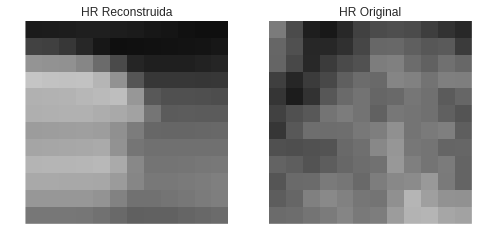

In [151]:

s=2
titles=['HR Reconstruida', 'HR Original']
plt = img_utils._isc(Ahrs[s], Aorigs[s],vmin=VMIN, vmax=VMAX, titles=titles) 
#plt.savefig(RES_BASE_FOLDER+'Yhr_compare_s'+str(subjects[s])+'.pdf' )
print mm(Aorigs[s]), mm(Ahrs[s])

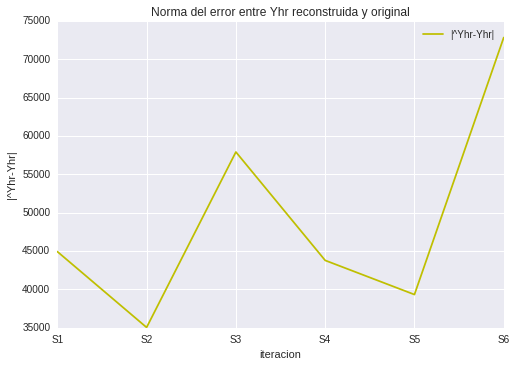

In [91]:
title='Norma del error entre Yhr reconstruida y original'
nombre='norma_error_yhr'
plt = plot_iterations(dif_norm_hrs, subjects,'|^Yhr-Yhr|', title=title, nombre=nombre, base_folder=RES_BASE_FOLDER)


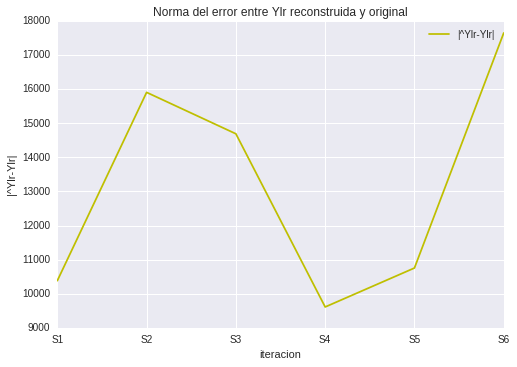

<module 'matplotlib.pyplot' from '/user/lgomez/home/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [92]:
title='Norma del error entre Ylr reconstruida y original'
nombre='norma_error_lr'
plot_iterations(dif_norm_lrs, subjects,'|^Ylr-Ylr|', title=title, nombre=nombre, base_folder=RES_BASE_FOLDER)

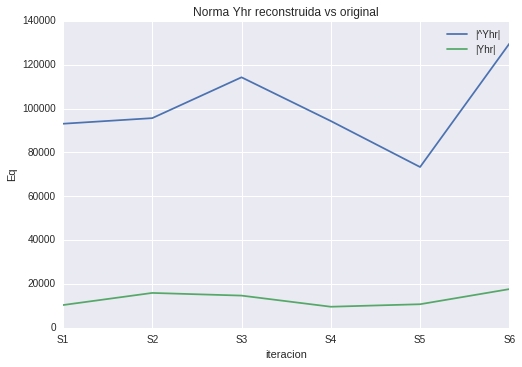

[  93086.8203125   95644.46875    114271.4921875   94329.453125
   73344.0546875  129620.984375 ]
[ 10381.80648024  15904.20255047  14689.00210472   9610.82195544
  10753.44279151  17646.04750472]


In [102]:
title='Norma Yhr reconstruida vs original'
nombre='cmp_normas_yhr'
plot_iterations_many([np.array(Yhr_recons_norms),Yhr_norms], subjects,['|^Yhr|', '|Yhr|'], \
                     ylabel='Eq',title=title, base_folder=RES_BASE_FOLDER, nombre=nombre)
print Yhr_recons_norms
print Yhr_norms

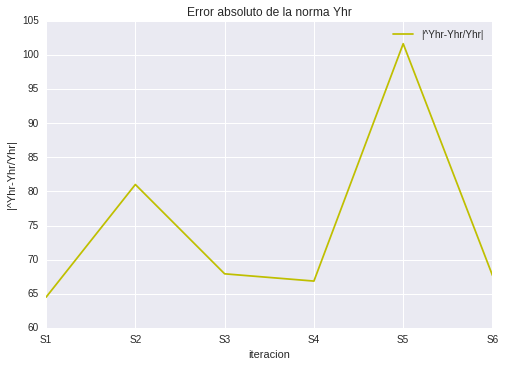

(array([ 4.3280422 ,  2.20367536,  3.94275285,  4.55583151,  3.65771172,
         4.12734756]),
 array([ 7.96634131,  5.01378588,  6.7793911 ,  8.81492047,  5.82051842,
         6.34561008]))

In [118]:
title='Error absoluto de la norma Yhr'
nombre='eabs_norma_yhr'

eabs_hr = [ np.linalg.norm(np.divide(Aorig[s]-Ahrs[s], Aorig[s])) for s in xrange(6)]
#otro=np.array(dif_norm_hrs)/np.array(Yhr_norms)
plot_iterations(eabs_hr, subjects,'|^Yhr-Yhr/Yhr|', \
                title=title, base_folder=RES_BASE_FOLDER, nombre=nombre)
#otro, np.array(Yhr_recons_norms-Yhr_norms)/np.array(Yhr_norms)

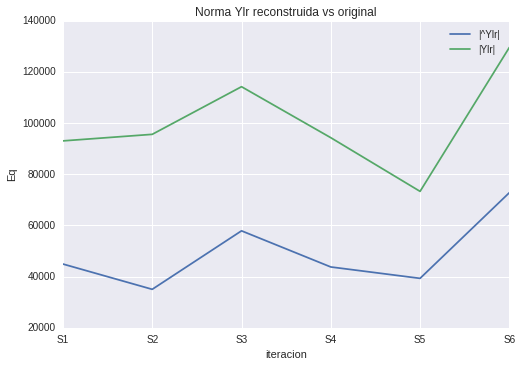

[ 44932.89660117  35047.69922151  57915.10497146  43785.285489
  39332.99373957  72831.37106598]
[  93086.8203125   95644.46875    114271.4921875   94329.453125
   73344.0546875  129620.984375 ]


In [111]:
nombre='cmp_normas_ylr'
title='Norma Ylr reconstruida vs original'
plot_iterations_many([np.array(Ylr_recons_norms),Ylr_norms], \
                     subjects,['|^Ylr|', '|Ylr|'], ylabel='Eq',title=title,\
                    base_folder=RES_BASE_FOLDER, nombre=nombre)

print Ylr_recons_norms
print Ylr_norms


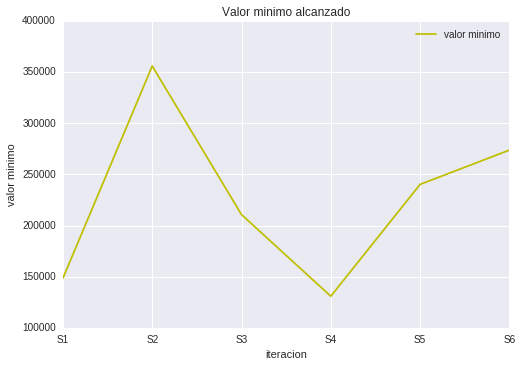

[ 0.5173012   0.63356272  0.49317976  0.53582594  0.4637194   0.43812052]


In [120]:
title='Valor minimo alcanzado'
nombre='opt_vals'
plot_iterations(optimal_vals, subjects,'valor minimo', title=title, nombre=nombre, base_folder=RES_BASE_FOLDER)
print (np.array(Ylr_norms)-np.array(Ylr_recons_norms))/np.array(Ylr_norms)

(4797.7993, 1508113.5)


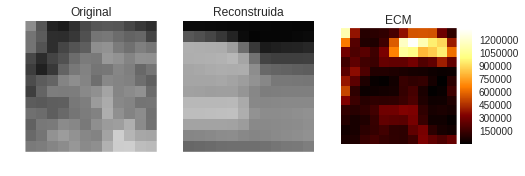

In [125]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
#reload(img_utils)


mse_img = mu.mse(Aorigs[s], Ahrs[s], axis=3)
#img, gtab = load_subject(1, subjects, bval=2000, bvalpos=bvals2000pos)
#Aorig = img.get_data()
print mm(mse_img)

titles = ['Original', 'Reconstruida',  'ECM']
plt, _, _, im3 = img_utils._isc3(Aorigs[s], Ahrs[s], mse_img, b=0,titles=titles, vmin=VMIN, vmax=VMAX)
plt.set_cmap('afmhot')
plt.clim(mm(mse_img[:,6,:]))
#plt.colorbar(im3)
divider = make_axes_locatable(im3.axes)
cax = divider.append_axes("right", size="10%", pad=0.05)
plt.colorbar(im3, cax=cax)
plt.savefig(RES_BASE_FOLDER + '/mse_yhr_s'+str(subjects[s])+'_voxels_cmp.pdf')


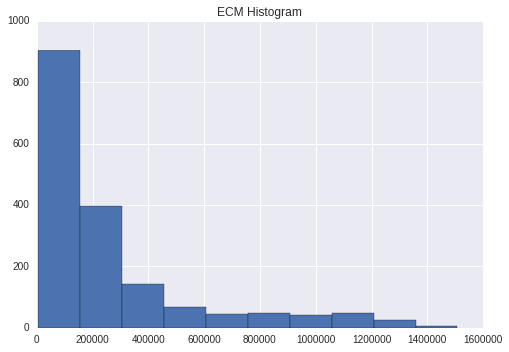

In [143]:

plt.hist(mse_img.flatten())
plt.title('ECM Histogram')
plt.savefig(RES_BASE_FOLDER+'mse_hist_s'+str(subjects[s])+'.pdf')


(-766.85572597525777, 0.7917432542328412)


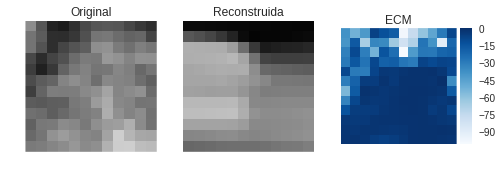

In [146]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
#reload(img_utils)


cdet_img = mu.coef_det_by_voxel_skl(Aorigs[s], Ahrs[s])
#img, gtab = load_subject(1, subjects, bval=2000, bvalpos=bvals2000pos)
#Aorig = img.get_data()
print mm(cdet_img)

titles = ['Original', 'Reconstruida',  'ECM']
plt, _, _, im3 = img_utils._isc3(Aorigs[s], Ahrs[s], cdet_img, titles=titles, vmin=VMIN, vmax=VMAX)
#plt.set_cmap('afmhot')
plt.clim(-100,1)
#plt.colorbar(im3)
divider = make_axes_locatable(im3.axes)
cax = divider.append_axes("right", size="10%", pad=0.05)
plt.colorbar(im3, cax=cax)
plt.savefig(RES_BASE_FOLDER+ 'cdet_yhr_s'+str(subjects[s])+'_voxels_cmp.pdf')


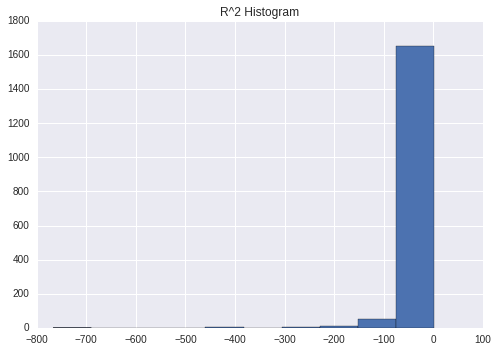

In [144]:
plt.hist(cdet_img.flatten())
plt.title('R^2 Histogram')
plt.savefig(RES_BASE_FOLDER+'cdet_hist_s'+str(subjects[s])+'.pdf')